In [31]:
# autoreload .py files
%load_ext autoreload
%autoreload 2  
import utility

from utility import load_dataset,tfidf_preprocessing,keras_text_preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import TextVectorization

DATASET = 3 # so functiona com train test val, o resto não têm val
batch_size = 256*2
SAVE_DIR = "models_dnn/"


MAX_TOKENS = 5000 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
train, test, val = load_dataset(DATASET)

RESULTS = {}

def tabular_pipeline(model_name,text_vectorization,max_len,
                     # train, test, val,
                     hidden_dims=[64,32,16],dropout = 0.2  ):
    
    tf_train,tf_test,tf_val = keras_text_preprocessing(train,test,val,text_vectorization,batch_size)    
    model = utility.get_dnn_model(max_tokens= max_len, hidden_dims = hidden_dims,dropout = dropout)
    model.summary()
    history,metrics_train = utility.train_model(model,model_name,tf_train,tf_val)

    utility.plot_losses(history)
    
    metrics_test = utility.test_model(model,tf_test)


    # Create inference model
    inputs = keras.Input(shape=(1,), dtype="string")
    processed_inputs = text_vectorization(inputs)
    outputs = model(processed_inputs)
    inference_model = keras.Model(inputs, outputs)

    inference_model.save(f'{SAVE_DIR}dnn_dataset{DATASET}_model{model_name}.keras')

    # inference
    df_input = pd.read_csv('../../datasets/val/dataset1_inputs.csv', sep='\t')
    df_output = pd.read_csv('../../datasets/val/dataset1_outputs.csv', sep='\t')
    utility.test_inference(inference_model,df_input['Text'],df_output['Label'])

    return metrics_train | metrics_test 


## Bag of words

#### Single words (unigrams) with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('study'), np.str_('have'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('new'), np.str_('its'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('system'), np.str_('galaxies'), np.str_('models'), np.str_('field'), np.str_('method'), np.str_('or'), np.str_('provide'), np.str_('two'), np.str_('formation'), np.str_('understanding'), np.str_('present'), np.str_('find'),

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5406 - loss: 0.6868 - val_accuracy: 0.7873 - val_loss: 0.6246
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7566 - loss: 0.6056 - val_accuracy: 0.9183 - val_loss: 0.5079
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.5042 - val_accuracy: 0.9430 - val_loss: 0.4004
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8946 - loss: 0.4148 - val_accuracy: 0.9557 - val_loss: 0.3130
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9129 - loss: 0.3448 - val_accuracy: 0.9620 - val_loss: 0.2477
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9245 - loss: 0.2856 - val_accuracy: 0.9660 - val_loss: 0.1985
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9365 - loss: 0.2439 - val_accuracy: 0.9683 - val_loss: 0.1626
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9453 - loss: 0.2075 - val_accuracy: 0

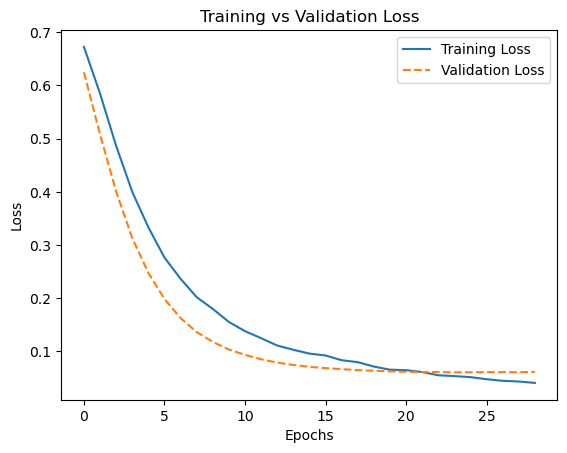

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9805 - loss: 0.0549 
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step

2025-03-23 09:52:59.315210: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1500
           1       0.98      0.97      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1474   26]
 [  39 1461]]
              precision    recall  f1-score   support

          AI       0.75      0.20      0.32        15
       Human       0.54      0.93      0.68        15

    accuracy                           0.57        30
   macro avg       0.64      0.57      0.50        30
weighted avg       0.64      0.57      0.50        30

[[ 3 12]
 [ 1 14]]


In [33]:
NAME = "unigram_be.keras"

text_vectorization_singlegram_be = TextVectorization(
    max_tokens= MAX_TOKENS,
    output_mode="multi_hot",
    standardize = "lower_and_strip_punctuation",
)

RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_singlegram_be,MAX_TOKENS)

#### Bigrams with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('of the'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('in the'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('that the'), np.str_('on the'), np.str_('study'), np.str_('to the'), np.str_('and the'), np.str_('have'), np.str_('for the'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('in this'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('this paper'), np.str_('new'), np.str_('its'), np.str_('of a'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('with the'), np.str_('show

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5307 - loss: 0.6745 - val_accuracy: 0.6890 - val_loss: 0.5866
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6964 - loss: 0.5646 - val_accuracy: 0.9050 - val_loss: 0.4551
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8506 - loss: 0.4532 - val_accuracy: 0.9503 - val_loss: 0.3465
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9036 - loss: 0.3648 - val_accuracy: 0.9643 - val_loss: 0.2671
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9289 - loss: 0.2962 - val_accuracy: 0.9670 - val_loss: 0.2084
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9427 - loss: 0.2462 - val_accuracy: 0.9697 - val_loss: 0.1676
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9502 - loss: 0.2097 - val_accuracy: 0.9717 - val_loss: 0.1377
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9534 - loss: 0.1837 - val_accuracy: 0

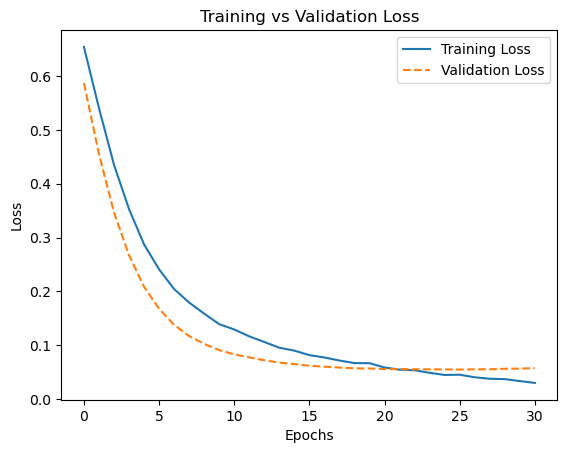

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9855 - loss: 0.0434 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1500
           1       0.99      0.98      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1483   17]
 [  30 1470]]
              precision    recall  f1-score   support

          AI       1.00      0.13      0.24        15
       Human       0.54      1.00      0.70        15

    accuracy                           0.57        30
   macro avg       0.77      0.57      0.47        30
weighted avg       0.77      0.57      0.47        30

[[ 2 13]
 [ 0 15]]


In [34]:
NAME = "bigram_be.keras"

text_vectorization_bigram_be = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="multi_hot",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_be,MAX_TOKENS)

#### Bigrams with TF-IDF encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('of the'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('in the'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('that the'), np.str_('on the'), np.str_('study'), np.str_('to the'), np.str_('and the'), np.str_('have'), np.str_('for the'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('in this'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('this paper'), np.str_('new'), np.str_('its'), np.str_('of a'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('with the'), np.str_('show

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5034 - loss: 1.3160 - val_accuracy: 0.6360 - val_loss: 0.6533
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5425 - loss: 0.8845 - val_accuracy: 0.7527 - val_loss: 0.6266
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5806 - loss: 0.7590 - val_accuracy: 0.8203 - val_loss: 0.5925
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6318 - loss: 0.6789 - val_accuracy: 0.9287 - val_loss: 0.4952
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7036 - loss: 0.5917 - val_accuracy: 0.9343 - val_loss: 0.3859
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7694 - loss: 0.5047 - val_accuracy: 0.9553 - val_loss: 0.2951
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8233 - loss: 0.4159 - val_accuracy: 0.9623 - val_loss: 0.2364
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8679 - loss: 0.3501 - val_accuracy: 0

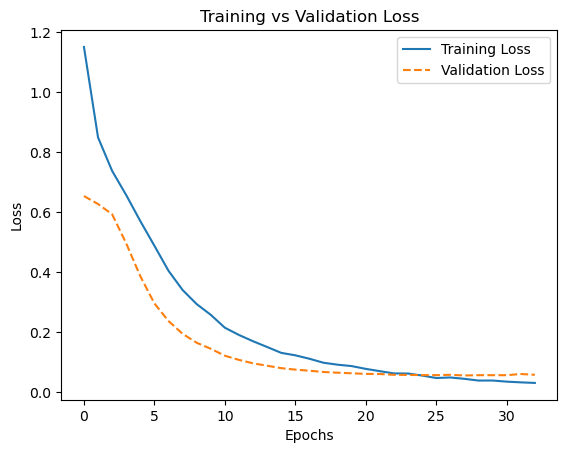

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9843 - loss: 0.0458 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1500
           1       0.98      0.99      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1465   35]
 [  19 1481]]
              precision    recall  f1-score   support

          AI       1.00      0.07      0.12        15
       Human       0.52      1.00      0.68        15

    accuracy                           0.53        30
   macro avg       0.76      0.53      0.40        30
weighted avg       0.76      0.53      0.40        30

[[ 1 14]
 [ 0 15]]


In [35]:
MAX_TOKENS = 5000 

NAME = "bigram_tf_idf.keras"
text_vectorization_bigram_tf_idf = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="tf_idf",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_tf_idf,MAX_TOKENS)

# Final results

In [37]:
from pprint import pprint
pprint(RESULTS)

{'bigram_be.keras': {'test_accuracy': 0.984333336353302,
                     'test_loss': 0.04833107441663742,
                     'train_accuracy': 0.992642879486084,
                     'train_loss': 0.029941506683826447,
                     'val_accuracy': 0.9819999933242798,
                     'val_loss': 0.05738908052444458},
 'bigram_tf_idf.keras': {'test_accuracy': 0.9819999933242798,
                         'test_loss': 0.05438174307346344,
                         'train_accuracy': 0.9916428327560425,
                         'train_loss': 0.029890799894928932,
                         'val_accuracy': 0.984000027179718,
                         'val_loss': 0.05698976665735245},
 'unigram_be.keras': {'test_accuracy': 0.9783333539962769,
                      'test_loss': 0.05940249189734459,
                      'train_accuracy': 0.9890714287757874,
                      'train_loss': 0.040840551257133484,
                      'val_accuracy': 0.9776666760444641,
      

# Conclusões

As 3 abordagens têm resultados muito semelhantes.

Apesar de terem bons resultados nos dados de teste. No dataset de inference os resultados não se mantêm e têm uma performance fraca.

Fez se algum tunning nos hyperametros da DNN até perfazer um equilibrio aceitável entre erro de validaçºao e treino, para assegurar que o modelo não dê overfit nem underfit.

Explorou-se também o tamanho do vocabulário das 3 estratégias com o argumento MAX_TOKENS. Dos valores experimentados {500,1000,5000,10000,20000} 5000 têve os melhores resultados no dataset de inference. Para {10000,20000}  os modelos facilmente davam overefit e classificavam tudo com a mesma classe. Para {500,1000} deu piores resultados que {5000}, parece ser um vocabulário demasiado curto para representar o problema, levando a demasiada perda de informação e portanto, underfit.
